# Практическая работа №3
## Разшильдяев А.М., ИКБО-03-21

1. Загрузим данные из файла "insurance.csv"

In [27]:
# all imports placed here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('./pr3_data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2. Посмотрим статистику по данным.

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Из показанного следует, что соличество записей - 1338, средние и медианные значения для возраста, индекса массы тела, количество детей примерно одинаковые (39, 30, 1 соответственно), а вот средние расходы (13270) значительно больше, чем медианные (9382).Это значит, что кто-то много тратит на лечение, что подтверждается максимальными расходами - она в 7 раз превышает медианную, и  далеко за пределами стандартного отклонения.

3. Посмотрем теперь на гистограммы для этих значений.

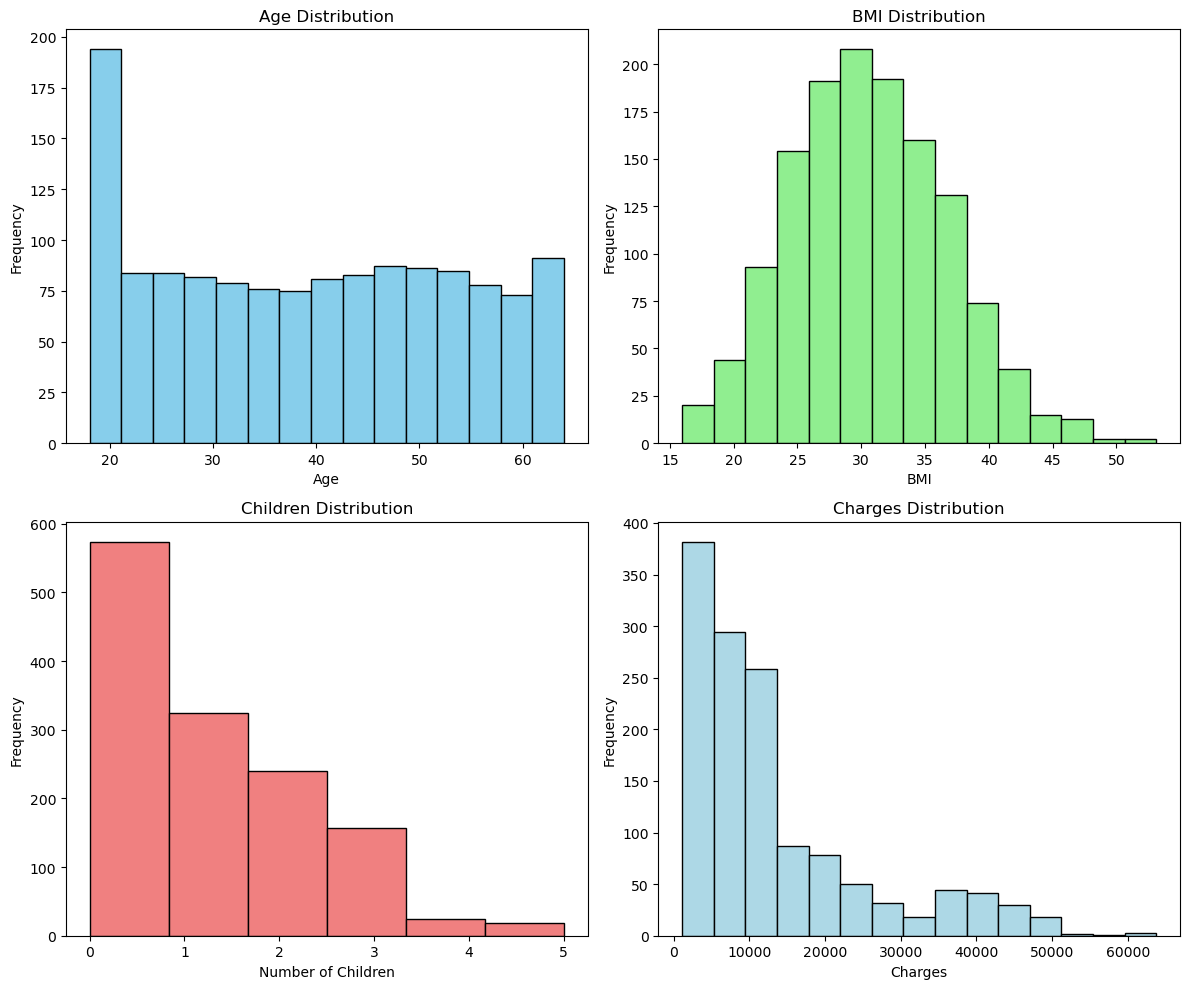

In [15]:
# Create histograms for age, bmi, children, and charges
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Age
axes[0, 0].hist(df['age'], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Histogram for BMI
axes[0, 1].hist(df['bmi'], bins=15, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Histogram for Children
axes[1, 0].hist(df['children'], bins=6, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Children Distribution')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Frequency')

# Histogram for Charges
axes[1, 1].hist(df['charges'], bins=15, color='lightblue', edgecolor='black')
axes[1, 1].set_title('Charges Distribution')
axes[1, 1].set_xlabel('Charges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Возраст:
Все промежутки возрастов представлены одинаковым количеством людей, около 76 человек в каждом промежутке. Исключением является первая возрастная группа, люди примерно до 22 лет. В нее попали чуть ли не 200 человек.

Индекс массы тела:
Большинство людей имеют индекс в районе 30, однако количество людей с более высоким имт больше, чем с меньшим.

Количество детей:
Чаще всего у людей либо нет детей, либо 1 ребенок. Однако большинство все-же имеют детей.

Расходы:
Подавляющее большинство людей имеют расходы меньше 15000. Большие расходы несут все меньшее количество людей. Однако эта последовательность нарушается при расходах около 35000, и начинает снова падать. Случаи расходов больше 50000 единичны, их немного.

4. Найдем среднее значение, медианное, моду, а также стандартное отклонение, дисперсию и размах для индекса массы тела и расходов.

In [23]:
def plot_distribution_with_stats(data, column, title):
    mean = np.mean(data)
    median = np.median(data)
    mode = data.mode()[0]

    plt.hist(data, bins=15, color='lightblue', edgecolor='black')
    
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mode, color='blue', linestyle='-', label=f'Mode: {mode:.2f}')
    
    plt.legend()
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    std_dev = np.std(data)
    var = np.var(data)
    data_range = np.max(data) - np.min(data)
    
    print(f'--- {title} ---')
    print(f'Mean: {mean:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Mode: {mode:.2f}')
    print(f'Standard Deviation: {std_dev:.2f}')
    print(f'Variance: {var:.2f}')
    print(f'Range: {data_range:.2f}')
    print()

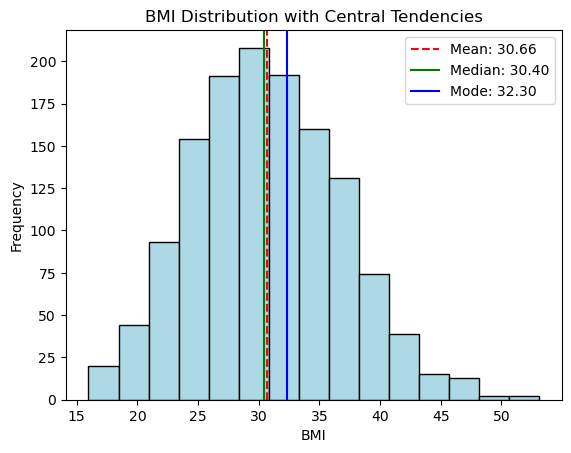

--- BMI Distribution with Central Tendencies ---
Mean: 30.66
Median: 30.40
Mode: 32.30
Standard Deviation: 6.10
Variance: 37.16
Range: 37.17



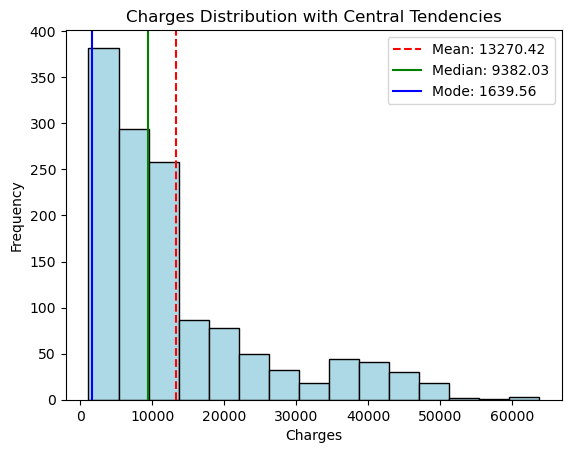

--- Charges Distribution with Central Tendencies ---
Mean: 13270.42
Median: 9382.03
Mode: 1639.56
Standard Deviation: 12105.48
Variance: 146542766.49
Range: 62648.55



In [29]:
plot_distribution_with_stats(df['bmi'], 'BMI', 'BMI Distribution with Central Tendencies')
plot_distribution_with_stats(df['charges'], 'Charges', 'Charges Distribution with Central Tendencies')

In [43]:
bmi = df['bmi']
bmi_mean = np.mean(bmi)
bmi_mode = bmi.mode()
bmi_median = np.median(bmi)

bmi_std = np.std(bmi)
bmi_var = np.var(bmi)
bmi_range = np.max(bmi) - np.min(bmi)

In [45]:
print('BMI')
print(f'Mean: {bmi_mean}')
print(f'Median: {bmi_median}')
print(f'Mode: {bmi_mode}')
print(f'Standard Deviation: {bmi_std}')
print(f'Variance: {bmi_var}')
print(f'Range: {bmi_range}')

BMI
Mean: 30.66339686098655
Median: 30.4
Mode: 0    32.3
Name: bmi, dtype: float64
Standard Deviation: 6.095907641589428
Variance: 37.160089974788384
Range: 37.17
